<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Absolute_and_Weighted_Frequency_of_Words_in_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/absolute-weighted-word-frequency


In [1]:
from collections import defaultdict

import pandas as pd

text_list = ['france', 'spain', 'spain beaches', 'france beaches', 'spain best beaches']

word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

,abs_freq
spain,3
beaches,3
france,2
best,1


In [2]:
 # default value is now a list with two ints
word_freq = defaultdict(lambda: [0, 0])

# the `views` column you had in the first DataFrame
num_list = [200, 180, 170, 160, 160]

# looping is now over both the text and the numbers
for text, num in zip(text_list, num_list):
    for word in text.split():
        # same as before
        word_freq[word][0] += 1
        # new line, incrementing the numeric value for each word
        word_freq[word][1] += num

columns = {0: 'abs_freq', 1: 'wtd_freq'}

abs_wtd_df = pd.DataFrame.from_dict(word_freq, orient='index') \
             .rename(columns=columns) \
             .sort_values('wtd_freq', ascending=False) \
             .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']) \
            .round()

abs_wtd_df.style.background_gradient(low=0, high=.7, subset=['rel_value'])

,abs_freq,wtd_freq,rel_value
spain,3,510,170.000000
beaches,3,490,163.000000
france,2,360,180.000000
best,1,160,160.000000


In [3]:
abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())
abs_wtd_df.style.background_gradient(low=0, high=0.8)

,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
spain,3,0.333333,0.333333,510,0.335526,0.335526,170.000000
beaches,3,0.333333,0.666667,490,0.322368,0.657895,163.000000
france,2,0.222222,0.888889,360,0.236842,0.894737,180.000000
best,1,0.111111,1.000000,160,0.105263,1.000000,160.000000


In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
final_list = []

for i in range(1, 156):
    if not i%10:
        print(i)
    page = 'http://www.boxofficemojo.com/alltime/domestic.htm?page=' + str(i) + '&p=.htm'
    resp = requests.get(page)
    soup = BeautifulSoup(resp.text, 'lxml')
    # trial and error to get the exact positions
    table_data = [x.text for x in soup.select('tr td')[0:511]]
    # put every 4 values in a row
    temp_list = [table_data[i:i+4] for i in range(0, len(table_data[:-3]), 4)]
    for temp in temp_list:
        final_list.append(temp)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


In [6]:
boxoffice_df = pd.DataFrame.from_records(final_list)

boxoffice_df.head(10)


,0,1,2,3
0,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015
1,2,Avengers: Endgame,"$858,373,000",2019
2,3,Spider-Man: No Way Home,"$814,866,759",2021
3,4,Avatar,"$785,221,649",2009
4,5,Top Gun: Maverick,"$718,732,821",2022
5,6,Black Panther,"$700,426,566",2018
6,7,Avatar: The Way of Water,"$684,075,767",2022
7,8,Avengers: Infinity War,"$678,815,482",2018
8,9,Titanic,"$674,292,608",1997
9,10,Jurassic World,"$653,406,625",2015


In [7]:
boxoffice_df.tail(15)

,0,1,2,3
19670,113,The Sixth Sense,"$293,506,292",1999
19671,114,Up,"$293,004,164",2009
19672,115,Star Wars: Episode V - The Empire Strikes Back,"$292,753,960",1980
19673,116,Inception,"$292,587,330",2010
19674,117,Harry Potter and the Order of the Phoenix,"$292,382,727",2007
19675,118,The Twilight Saga: Breaking Dawn - Part 2,"$292,324,737",2012
19676,119,"The Chronicles of Narnia: The Lion, the Witch ...","$291,710,957",2005
19677,120,Man of Steel,"$291,045,518",2013
19678,121,"Monsters, Inc.","$290,642,256",2001
19679,122,Harry Potter and the Goblet of Fire,"$290,469,928",2005


In [8]:
na_year_idx =  [i for i, x in enumerate(final_list) if x[3] == 'n/a'] # get the indexes of the 'n/a' values
new_years = [1998, 1999, 1960, 1973]  # got them by checking online

print(*[(i, x) for i, x in enumerate(final_list) if i in na_year_idx], sep='\n')
print('new year values:', new_years)


new year values: [1998, 1999, 1960, 1973]


In [9]:
import re
regex = '|'.join(['\$', ',', '\^'])

columns = ['rank', 'title', 'lifetime_gross', 'year']

boxoffice_df = pd.DataFrame({
    'rank': [int(x[0]) for x in final_list],  # convert ranks to integers
    'title': [x[1] for x in final_list],  # get titles as is
    #'studio': [x[2] for x in final_list],  # get studio names as is
    'lifetime_gross': [int(re.sub(regex, '', x[2])) for x in final_list],  # remove special characters and convert to integer
    'year': [int(re.sub(regex, '', str(x[3]))) for x in final_list],  # remove special characters and convert to integer
})
print('rows:', boxoffice_df.shape[0])
print('columns:', boxoffice_df.shape[1])
print('\ndata types:')
print(boxoffice_df.dtypes)
boxoffice_df.head(15)

rows: 19685
columns: 4

data types:
rank               int64
title             object
lifetime_gross     int64
year               int64
dtype: object


,rank,title,lifetime_gross,year
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015
1,2,Avengers: Endgame,858373000,2019
2,3,Spider-Man: No Way Home,814866759,2021
3,4,Avatar,785221649,2009
4,5,Top Gun: Maverick,718732821,2022
5,6,Black Panther,700426566,2018
6,7,Avatar: The Way of Water,684075767,2022
7,8,Avengers: Infinity War,678815482,2018
8,9,Titanic,674292608,1997
9,10,Jurassic World,653406625,2015


In [10]:
def word_frequency(text_list, num_list, sep=None):
    word_freq = defaultdict(lambda: [0, 0])

    for text, num in zip(text_list, num_list):
        for word in text.split(sep=sep):
            word_freq[word][0] += 1
            word_freq[word][1] += num

    columns = {0: 'abs_freq', 1: 'wtd_freq'}

    abs_wtd_df = (pd.DataFrame.from_dict(word_freq, orient='index')
                 .rename(columns=columns )
                 .sort_values('wtd_freq', ascending=False)
                 .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']).round())

    abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
    abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
    abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
    abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

    return abs_wtd_df
word_frequency(boxoffice_df['title'], boxoffice_df['lifetime_gross']).head()

,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
The,6045,0.076772,0.076772,2422959459980,0.077197,0.077197,400820423.0
the,5425,0.068898,0.145669,1885254859125,0.060065,0.137262,347512416.0
of,4650,0.059055,0.204724,1693916061445,0.053969,0.191231,364283024.0
-,2015,0.025591,0.230315,854570848825,0.027227,0.218458,424104640.0
Star,1550,0.019685,0.250000,752436440595,0.023973,0.242431,485442865.0


In [11]:
# words will be expanded
def word_frequency(text_list, num_list, sep=None, rm_words=('the', 'and', 'a')):
    word_freq = defaultdict(lambda: [0, 0])

    for text, num in zip(text_list, num_list):
        for word in text.split(sep=sep):
            # This should take care of ignoring the word if it's in the stop words
            if word.lower() in rm_words:
                continue
            # .lower() makes sure we are not duplicating words
            word_freq[word.lower()][0] += 1
            word_freq[word.lower()][1] += num

    columns = {0: 'abs_freq', 1: 'wtd_freq'}

    abs_wtd_df = (pd.DataFrame.from_dict(word_freq, orient='index')
                 .rename(columns=columns )
                 .sort_values('wtd_freq', ascending=False)
                 .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']).round())

    abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
    abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
    abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
    abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

    abs_wtd_df = abs_wtd_df.reset_index().rename(columns={'index': 'word'})

    return abs_wtd_df

In [12]:
from collections import defaultdict
word_freq_df =  word_frequency(boxoffice_df['title'],
                               boxoffice_df['lifetime_gross'],
                               rm_words=['of','in', 'to', 'and', 'a', 'the',
                                         'for', 'on', '&', 'is', 'at', 'it',
                                         'from', 'with'])



word_freq_df.head(15).style.bar(['abs_freq', 'wtd_freq', 'rel_value'],
                                               color='#60DDFF') # E6E9EB

,word,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
0,-,2015,0.033766,0.033766,854570848825,0.035202,0.035202,424104640.000000
1,star,1550,0.025974,0.059740,752436440595,0.030994,0.066196,485442865.000000
2,2,1860,0.031169,0.090909,744270397500,0.030658,0.096854,400145375.000000
3,wars:,1395,0.023377,0.114286,669737741990,0.027588,0.124442,480098740.000000
4,episode,1395,0.023377,0.137662,669737741990,0.027588,0.152030,480098740.000000
5,part,1085,0.018182,0.155844,333627924565,0.013743,0.165772,307491175.000000
6,avengers:,465,0.007792,0.163636,309410124250,0.012745,0.178518,665398117.000000
7,spider-man:,620,0.010390,0.174026,298018052980,0.012276,0.190794,480674279.000000
8,potter,930,0.015584,0.189610,291693910845,0.012015,0.202809,313649366.000000
9,harry,930,0.015584,0.205195,291693910845,0.012015,0.214825,313649366.000000


In [13]:
(word_freq_df.sort_values('abs_freq', ascending=False)
 .head(15)
    .style.bar(['abs_freq', 'wtd_freq', 'rel_value'],
               color='#60DDFF'))

,word,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
0,-,2015,0.033766,0.033766,854570848825,0.035202,0.035202,424104640.000000
2,2,1860,0.031169,0.090909,744270397500,0.030658,0.096854,400145375.000000
1,star,1550,0.025974,0.059740,752436440595,0.030994,0.066196,485442865.000000
3,wars:,1395,0.023377,0.114286,669737741990,0.027588,0.124442,480098740.000000
4,episode,1395,0.023377,0.137662,669737741990,0.027588,0.152030,480098740.000000
5,part,1085,0.018182,0.155844,333627924565,0.013743,0.165772,307491175.000000
8,potter,930,0.015584,0.189610,291693910845,0.012015,0.202809,313649366.000000
9,harry,930,0.015584,0.205195,291693910845,0.012015,0.214825,313649366.000000
22,twilight,620,0.010390,0.319481,181653780470,0.007483,0.331959,292989968.000000
7,spider-man:,620,0.010390,0.174026,298018052980,0.012276,0.190794,480674279.000000


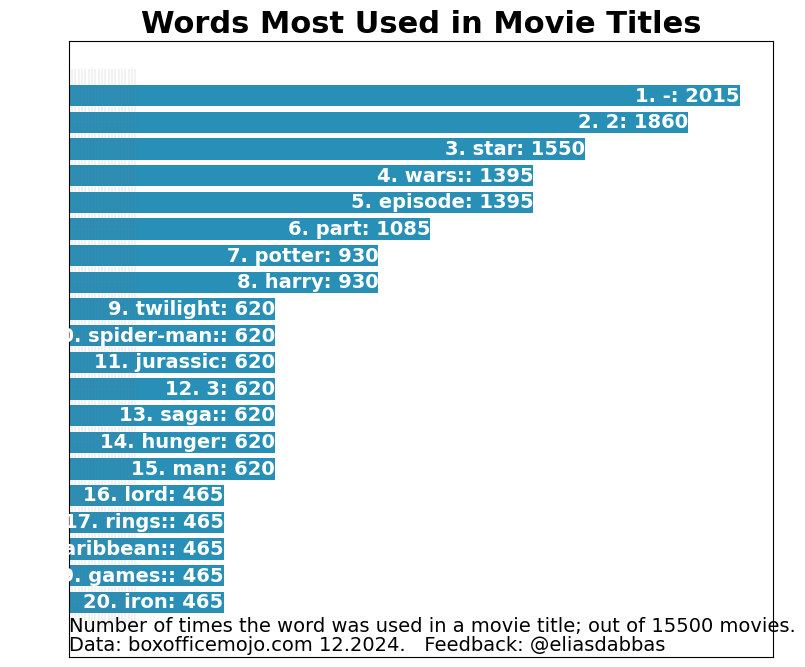

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)

word_freq_df_abs = word_freq_df.sort_values('abs_freq', ascending=False).reset_index()

plt.barh(range(20),
         list(reversed(word_freq_df_abs['abs_freq'][:20])), color='#288FB7')
for i, word in enumerate(word_freq_df_abs['word'][:20]):
    plt.text(word_freq_df_abs['abs_freq'][i], 20-i-1,
             s=str(i+1) + '. ' + word + ': '  + str(word_freq_df_abs['abs_freq'][i]),
             ha='right', va='center', fontsize=14, color='white', fontweight='bold')
plt.text(0.4, -1.1, s='Number of times the word was used in a movie title; out of 15500 movies.', fontsize=14)
plt.text(0.4, -1.8, s='Data: boxofficemojo.com 12.2024.   Feedback: @eliasdabbas', fontsize=14)


plt.vlines(range(0, 210, 10), -1, 20, colors='gray', alpha=0.1)
plt.hlines(range(0, 20, 2), 0, 210, colors='gray', alpha=0.1)
plt.yticks([])
plt.xticks([])
plt.title('Words Most Used in Movie Titles', fontsize=22, fontweight='bold')

plt.show()

In [22]:
boxoffice_df.head(10)

,rank,title,lifetime_gross,year
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015
1,2,Avengers: Endgame,858373000,2019
2,3,Spider-Man: No Way Home,814866759,2021
3,4,Avatar,785221649,2009
4,5,Top Gun: Maverick,718732821,2022
5,6,Black Panther,700426566,2018
6,7,Avatar: The Way of Water,684075767,2022
7,8,Avengers: Infinity War,678815482,2018
8,9,Titanic,674292608,1997
9,10,Jurassic World,653406625,2015


In [23]:
(boxoffice_df[boxoffice_df['title']
              .str
              .contains('2 | 2', case=False)] # spaces used to exclude words like '2010'
              .head(10))

,rank,title,lifetime_gross,year
10,11,Inside Out 2,652980194,2024
15,16,Incredibles 2,608581744,2018
29,30,Shrek 2,444854717,2004
50,51,Guardians of the Galaxy Vol. 2,389813101,2017
53,54,Harry Potter and the Deathly Hallows: Part 2,381447587,2011
57,58,Spider-Man 2,374337514,2004
59,60,Moana 2,370590553,2024
63,64,Despicable Me 2,368065385,2013
89,90,Deadpool 2,324591735,2018
99,100,Iron Man 2,312433331,2010


In [24]:
boxoffice_df[boxoffice_df['title'].str.contains('star | star', case=False)].head(10)

,rank,title,lifetime_gross,year
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015
14,15,Star Wars: Episode VIII - The Last Jedi,620181382,2017
19,20,Rogue One: A Star Wars Story,533539991,2016
20,21,Star Wars: Episode IX - The Rise of Skywalker,515202542,2019
22,23,Star Wars: Episode I - The Phantom Menace,487576624,1999
25,26,Star Wars: Episode IV - A New Hope,460998507,1977
55,56,Star Wars: Episode III - Revenge of the Sith,380270577,2005
97,98,Star Wars: Episode VI - Return of the Jedi,316566101,1983
100,101,Star Wars: Episode II - Attack of the Clones,310676740,2002
114,115,Star Wars: Episode V - The Empire Strikes Back,292753960,1980


In [25]:
boxoffice_df[boxoffice_df['title'].str.contains('man | man', case=False)].head(10)

,rank,title,lifetime_gross,year
35,36,Pirates of the Caribbean: Dead Man's Chest,423315812,2006
40,41,Iron Man 3,409013994,2013
57,58,Spider-Man 2,374337514,2004
76,77,Spider-Man 3,337281992,2007
85,86,Batman v Superman: Dawn of Justice,330360194,2016
94,95,Iron Man,319034126,2008
99,100,Iron Man 2,312433331,2010
119,120,Man of Steel,291045518,2013
162,36,Pirates of the Caribbean: Dead Man's Chest,423315812,2006
167,41,Iron Man 3,409013994,2013
